In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [4]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:

'''age Patient's Age

sex Patient's Gender

cp Patient's CP Level

trestbps Patient's Trest BPS Level

chol Patient's Cholestrol Level

fbs Patient's FBS Level

restecg Patient's Resting ECG Levels

thalach Patient's Thalach Levels

exang Patient's Exang Levels

oldpeak Patient's Old Peak History Recorded'''

Исследовать данные.

In [5]:
print(df.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


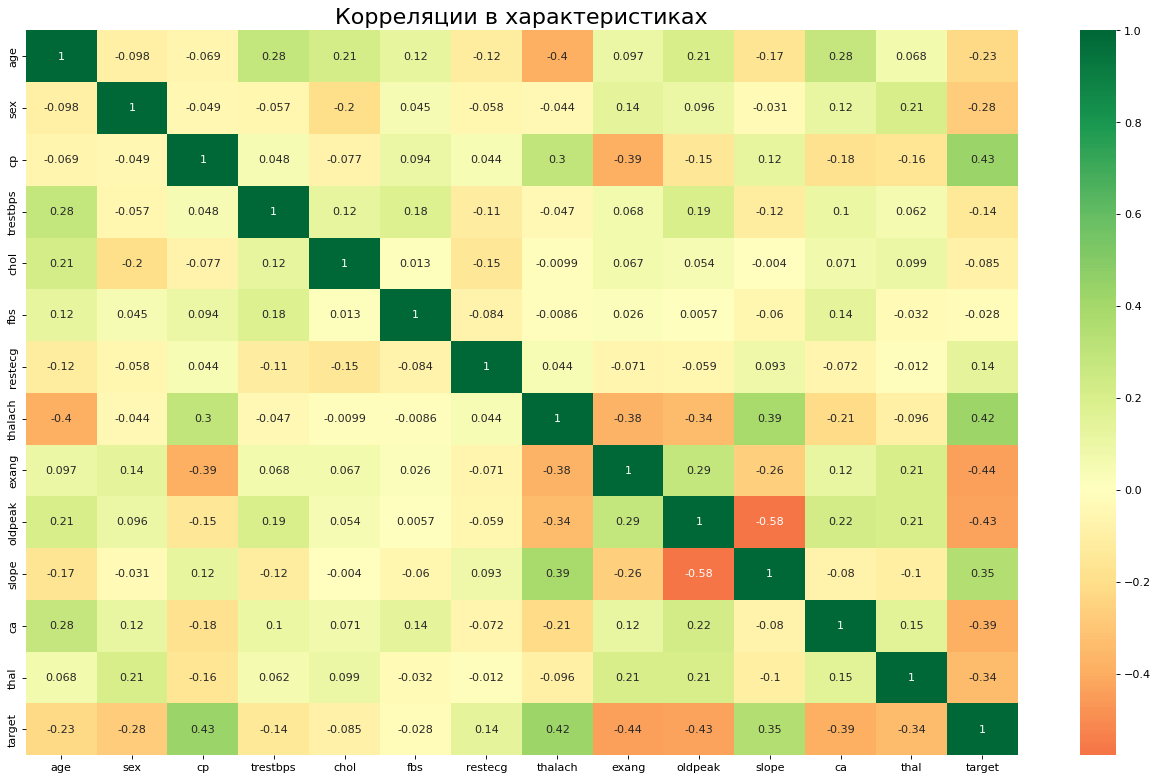

In [6]:
plt.figure(figsize=(20,12), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)
plt.title('Корреляции в характеристиках', fontsize=20)
plt.show()

Создать тренировочную и тестовую подвыборки

In [33]:
y = df['target']
x = df.drop(columns='target')
X = preprocessing.StandardScaler().fit(x).transform(x)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Построить модель логистической регрессии по своему набору данных

In [34]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Получить коэффиценты уравнения логистической регрессии (т.е. уравнение разделяющей поверхности). Сделать вывод какие из признаков оказались наиболее значимыми, какие нет и почему

In [35]:
w0 = model.intercept_[0]
w1 = model.coef_
w1 = w1.reshape(-1)
mas = []
i = 0
for key in x.keys():
  mas.append((key, w1[i]))
  i += 1
mas.sort(key=lambda x: abs(x[1]))
print('bias', w0)
mas

bias 0.185561152585028


[('fbs', -0.12825707561099553),
 ('restecg', 0.19581302293973912),
 ('age', -0.21624514538787504),
 ('thalach', 0.24488607683928929),
 ('trestbps', -0.29079855044782865),
 ('chol', -0.32722481845558676),
 ('exang', -0.4001185155744216),
 ('slope', 0.4103024533073466),
 ('thal', -0.5460201916635291),
 ('sex', -0.600197461577492),
 ('oldpeak', -0.7368771722697516),
 ('ca', -0.9154185076787085),
 ('cp', 1.1298874168601751)]

Написать уравнение логистической регрессии

In [36]:
r = 3
ans = str(round(w0, r))
for i in range(13):
  ans = ans + ' + ' + str(round(w1[i], r)) + '*' + list(df.columns)[i]
print(ans)

0.186 + -0.216*age + -0.6*sex + 1.13*cp + -0.291*trestbps + -0.327*chol + -0.128*fbs + 0.196*restecg + 0.245*thalach + -0.4*exang + -0.737*oldpeak + 0.41*slope + -0.915*ca + -0.546*thal


Вывести confusion matrix для получившейся модели

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
answers_pred = model.predict(X_test)
cm = confusion_matrix(y_test, answers_pred)
cm

array([[24,  9],
       [ 4, 24]])

Вручную посчитать метрики: accuracy, recall, precision. f1

In [38]:
print('accuracy:', (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1]))
recall = cm[0][0]/(cm[0][0]+cm[1][0])
precision = cm[0][0]/(cm[0][0]+cm[0][1])
print('recall:', recall)
print('precision:', precision)
print('f1:', 2 * (precision * recall)/(precision+recall))

accuracy: 0.7868852459016393
recall: 0.8571428571428571
precision: 0.7272727272727273
f1: 0.7868852459016394


Посчитать метрики с помощью библиотеки sklearn и сравнить с оценками из п.7

In [39]:
print('accuracy:', accuracy_score(y_test, answers_pred))
print('recall:', recall_score(y_test, answers_pred))
print('precision:', precision_score(y_test, answers_pred))
print('f1:', f1_score(y_test, answers_pred))

accuracy: 0.7868852459016393
recall: 0.8571428571428571
precision: 0.7272727272727273
f1: 0.7868852459016394


Сделать письменный вывод получившихся результатов (хорошие или плохие получились метрики и почему)